In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from geopy.distance import great_circle

In [2]:
df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')

C:\Users\Windows\AppData\Local\Temp\ipykernel_45792\4290638332.py:1: DtypeWarning: Columns (14,20,34,37,39,41,43,45,46,47,48,49,50,51,52,53,54,55,57,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\code\HiSCoD\db_hiscod_csv_v1_en.csv', sep=';')


In [7]:
city.nunique()

9235

In [3]:
ID = df['id']
latitude = df['city_latitude']
longitude = df['city_longitude']
city = df['city_name']
country = df['country_name']

In [13]:
Eng_df = df[df['country_name'] == 'England']
Eng_df.dropna(subset=['city_latitude'], inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_45792\1281430518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Eng_df.dropna(subset=['city_latitude'], inplace=True)


In [19]:
Eng_df['admin_level_2'].nunique()

264

In [15]:
Fr_df = df[df['country_name'] == 'France']
Fr_df.dropna(subset=['city_latitude'], inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_45792\2229038633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fr_df.dropna(subset=['city_latitude'], inplace=True)


In [20]:
Fr_df['admin_level_2'].nunique()

97

In [21]:
df['admin_level_2'].nunique()

694

In [22]:
def calculate_distance(coord1, coord2):
    return great_circle(coord1, coord2).kilometers

In [23]:
calculate_distance((46.33,6.06), (45.98,4.76))

107.4292100180416

In [76]:
distance_threshold = 50

In [77]:
G_eng = nx.Graph()

In [78]:
for idx, row in Eng_df.iterrows():
    G_eng.add_node(row['id'], city=row['city_name'], pos=(row['city_latitude'], row['city_longitude']))

In [79]:
for i, row1 in Eng_df.iterrows():
    for j, row2 in Eng_df.iterrows():
        if i < j:  
            coord1 = (row1['city_latitude'], row1['city_longitude'])
            coord2 = (row2['city_latitude'], row2['city_longitude'])
            distance = calculate_distance(coord1, coord2)
            if distance <= distance_threshold:
                G_eng.add_edge(row1['id'], row2['id'], weight=distance)

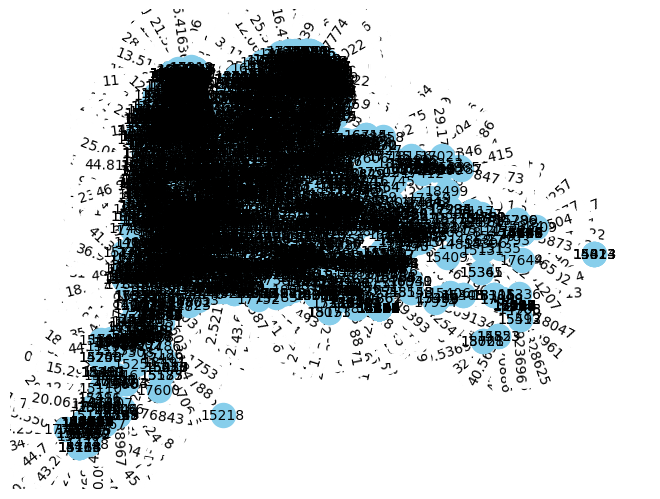

In [92]:
# 绘制图
pos = {node: (data['pos'][0], data['pos'][1]) for node, data in G_eng.nodes(data=True)}
nx.draw(G_eng, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10)

# 添加标签
labels = nx.get_edge_attributes(G_eng, 'weight')
nx.draw_networkx_edge_labels(G_eng, pos, edge_labels=labels)

plt.show()

In [89]:
print(G_eng.nodes(data=True))

[(14369, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14370, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14371, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14372, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14373, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14374, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14375, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14376, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14377, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14378, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14379, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14380, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.98127494167139)}), (14381, {'city': 'Liverpool', 'pos': (53.4047978340497, -2.9812

In [69]:
End_df_subset = Eng_df.head(1000)

In [65]:
End_df_subset.shape

(500, 85)

In [38]:
print(sum(Eng_df['city_longitude'].isnull()))

0
